In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns; sns.set_style('whitegrid')
from matplotlib import pyplot as plt



In [ ]:
#import 2020 QB stats CSV
DF2020 = pd.read_csv('supp/2020QB.csv')
#splitting on '\' to keep player name
Name = DF2020['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2020['Player Name'] = Name
DF2020['Pos'] = DF2020['Pos'].str.upper()
DF2020 = DF2020.iloc[:, 2:]
DF2020['Year'] = '2020'



In [ ]:
#import 2019 QB stats CSV
DF2019 = pd.read_csv('supp/2019QB.csv')
#splitting on '\' to keep player name
Name = DF2019['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2019['Player Name'] = Name
DF2019['Pos'] = DF2019['Pos'].str.upper()
DF2019 = DF2019.iloc[:, 2:]
DF2019['Year'] = '2019'



In [ ]:
#import 2018 QB stats CSV
DF2018 = pd.read_csv('supp/2018QB.csv')
#splitting on '\' to keep player name
Name = DF2018['Player'].str.split('\\').str[0]
Name = Name.values.tolist()

#function to remove puncutaion from player names
def remove_punc(string):
    punc = '*+'
    for ele in string:
        if ele in punc:
            string = string.replace(ele,'')
    return string
#needed to add .strip() to lagging white space which affected merge downstream
Name = [remove_punc(i).strip() for i in Name]
DF2018['Player Name'] = Name
DF2018['Pos'] = DF2018['Pos'].str.upper()
DF2018 = DF2018.iloc[:, 2:]
DF2018['Year'] = '2018'

In [ ]:
#concat DF here with fields I want, all 3 seasons in 1 DF
DF_QB = pd.concat([DF2020,DF2019,DF2018])
DF_QB = DF_QB[['Player Name', 'Age', 'Pos', 'Tm', 'Year', 'G', 'GS', 'Cmp', 'Att', 'Cmp%' ,'Yds', 'TD']]
DF_QB.head(5)


In [ ]:
#Loading Player Measureables data
DFPM = pd.read_csv('supp/playermeasureables - Sheet1.csv')
Last_NamePM = DFPM['Player'].str.split(', ').str[0]
Last_NamePM = Last_NamePM.values.tolist()
First_NamePM = DFPM['Player'].str.split(', ').str[1]
First_NamePM = First_NamePM.values.tolist()
DFPM['First Name'] = First_NamePM
DFPM['Last Name'] = Last_NamePM
DFPM['Player Name'] = DFPM[['First Name', 'Last Name']].apply(lambda x: ' '.join(x), axis=1)

#Convert Height to Inches
def parse_ht(ht):
    # format: 7'0"
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return int((12*ft_) + in_)

Height = DFPM["Height"].apply(lambda x:parse_ht(x))
DFPM['Height(IN)'] = Height
DFPM_Info = DFPM[['Player Name', 'Pos', 'Team', 'Height(IN)', 'Weight', 'DOB']]
DFPM_Info.head(5)



In [ ]:
#Merged 3 Season DF with player measureables DF
DF_QB_PM = pd.merge(DF_QB, DFPM_Info, how='left', on=['Player Name', 'Pos'])
#Filtered QB position and those that have greater than 60 passing attempts on the season
DF_QB_PM = DF_QB_PM[DF_QB_PM['Att'] > 60]
DF_QB_PM = DF_QB_PM[DF_QB_PM['Pos'] == 'QB']
DF_QB_PM = DF_QB_PM[DF_QB_PM['Height(IN)'].notnull()]


In [ ]:
Means_By_Year = DF_QB_PM.groupby('Year').mean()
Means_By_Year

In [344]:
# #2018 data summary stats
DF_QB_PM_2018 = DF_QB_PM[DF_QB_PM['Year'] == '2018']
DF_QB_PM_2018.describe().transpose()




,count,mean,std,min,25%,50%,75%,max
Age,35.0,28.314286,5.524126,21.0,24.0,27.0,32.0,41.0
G,35.0,13.200000,3.270186,5.0,11.0,14.0,16.0,16.0
GS,35.0,12.571429,3.728158,5.0,10.5,13.0,16.0,16.0
Cmp,35.0,278.914286,99.804624,99.0,211.0,280.0,364.5,452.0
Att,35.0,427.228571,141.101150,169.0,329.5,427.0,554.0,675.0
Cmp%,35.0,64.737143,4.696187,52.8,62.1,65.6,68.1,74.4
Yds,35.0,3200.600000,1157.508282,1003.0,2322.0,3223.0,4107.0,5129.0
TD,35.0,20.971429,10.199440,6.0,12.5,21.0,28.0,50.0
Height(IN),35.0,75.171429,1.671310,71.0,74.0,75.0,76.0,78.0


In [345]:
#2019 data summary stats
DF_QB_PM_2019 = DF_QB_PM[DF_QB_PM['Year'] == '2019']
DF_QB_PM_2019.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,34.0,27.852941,5.598335,22.0,24.00,26.00,31.0,42.0
G,34.0,13.529412,3.286661,5.0,13.00,15.00,16.0,16.0
GS,34.0,13.088235,3.687552,5.0,12.00,15.00,16.0,16.0
Cmp,34.0,291.205882,89.128365,94.0,271.25,312.50,352.0,408.0
Att,34.0,455.470588,138.939759,156.0,411.00,486.50,540.0,626.0
Cmp%,34.0,63.902941,4.064293,54.0,61.15,63.55,66.1,74.3
Yds,34.0,3339.529412,1071.131665,984.0,2990.25,3511.50,4037.0,5109.0
TD,34.0,21.352941,7.323198,4.0,18.25,22.00,26.0,36.0
Height(IN),34.0,74.735294,1.711084,70.0,74.00,75.00,76.0,77.0


In [346]:
#2020 data summary stats
DF_QB_PM_2020 = DF_QB_PM[DF_QB_PM['Year'] == '2020']
DF_QB_PM_2020.describe().transpose()
#DF_QB_PM_2018.head(5)

,count,mean,std,min,25%,50%,75%,max
Age,46.0,29.065217,5.607147,22.0,24.000,28.00,32.000,43.0
G,46.0,11.717391,4.510053,3.0,9.000,13.50,16.000,16.0
GS,46.0,10.826087,5.065370,1.0,6.250,12.00,16.000,16.0
Cmp,46.0,243.239130,120.784139,35.0,155.250,246.50,364.000,407.0
Att,46.0,370.673913,177.180141,64.0,229.500,383.00,527.500,626.0
Cmp%,46.0,64.760870,4.606540,52.0,63.425,65.65,67.525,72.7
Yds,46.0,2701.478261,1402.371194,375.0,1640.000,2672.50,4055.750,4823.0
TD,46.0,18.239130,12.415375,1.0,7.250,15.50,26.000,48.0
Height(IN),46.0,74.978261,1.971904,70.0,74.000,75.00,76.000,79.0


Text(0, 0.5, 'Number of Quarterbacks')

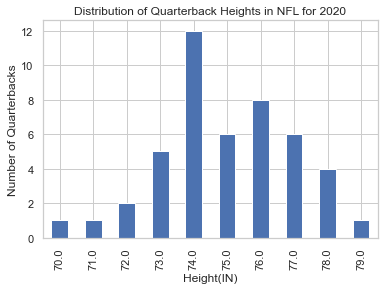

In [360]:
#Distribution of QB heights for 2020
DF_QB_PM_2020['Height(IN)'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Distribution of Quarterback Heights in NFL for 2020')
plt.xlabel('Height(IN)')
plt.ylabel('Number of Quarterbacks')

Text(0, 0.5, 'Number of Quarterbacks')

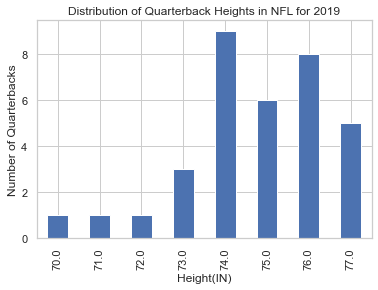

In [361]:
#Distribution of QB heights for 2019
DF_QB_PM_2019['Height(IN)'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Distribution of Quarterback Heights in NFL for 2019')
plt.xlabel('Height(IN)')
plt.ylabel('Number of Quarterbacks')

Text(0, 0.5, 'Number of Quarterbacks')

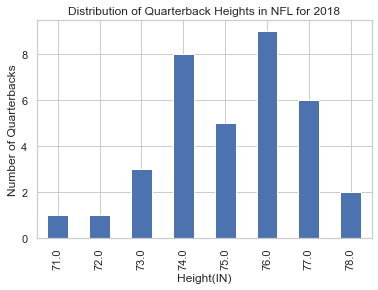

In [358]:
#Distribution of QB heights for 2018
DF_QB_PM_2018['Height(IN)'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Distribution of Quarterback Heights in NFL for 2018')
plt.xlabel('Height(IN)')
plt.ylabel('Number of Quarterbacks')

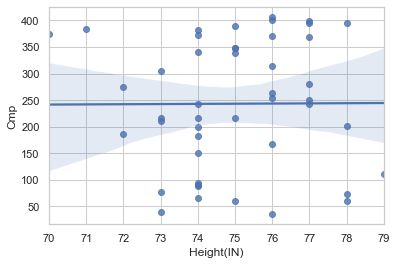

In [356]:
#2020 linear regression height to completions
sns.regplot(x=DF_QB_PM_2020['Height(IN)'], y=DF_QB_PM_2020['Cmp']);

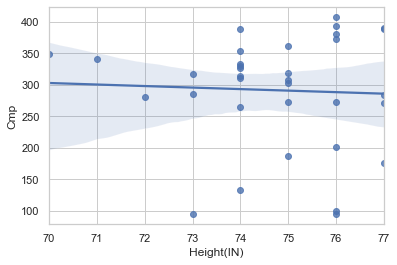

In [355]:
#2019 linear regression height to completions
sns.regplot(x=DF_QB_PM_2019['Height(IN)'], y=DF_QB_PM_2019['Cmp']);

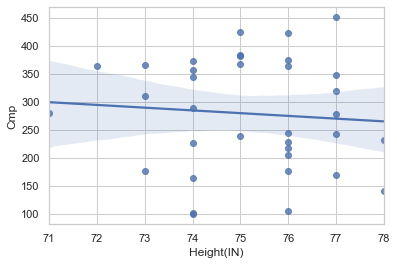

In [354]:
#2018 linear regression height to completions
sns.regplot(x=DF_QB_PM_2018['Height(IN)'], y=DF_QB_PM_2018['Cmp']);

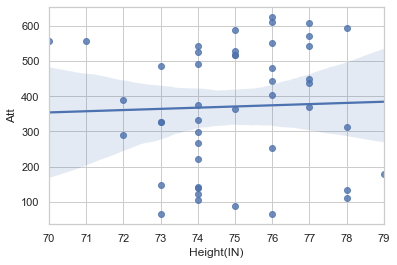

In [353]:
#2020 linear regression height to attempts
sns.regplot(x=DF_QB_PM_2020['Height(IN)'], y=DF_QB_PM_2020['Att']);

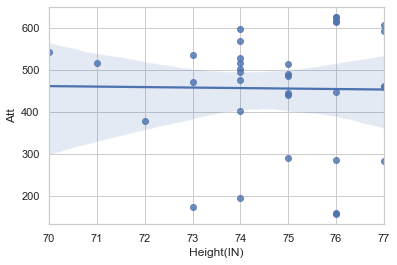

In [352]:
#2019 linear regression height to attempts
sns.regplot(x=DF_QB_PM_2019['Height(IN)'], y=DF_QB_PM_2019['Att']);

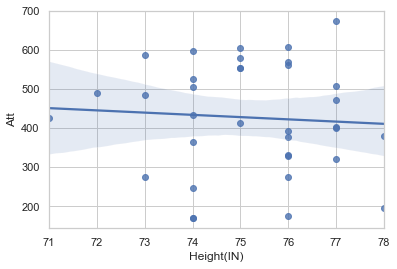

In [351]:
#2019 linear regression height to attempts
sns.regplot(x=DF_QB_PM_2018['Height(IN)'], y=DF_QB_PM_2018['Att']);

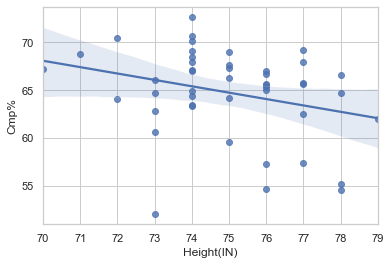

In [350]:
#2020 linear regression height to completion percentage
sns.regplot(x=DF_QB_PM_2020['Height(IN)'], y=DF_QB_PM_2020['Cmp%']);

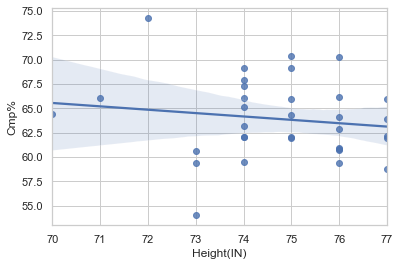

In [348]:
#2019 linear regression height to completion percentage
sns.regplot(x=DF_QB_PM_2019['Height(IN)'], y=DF_QB_PM_2019['Cmp%']);

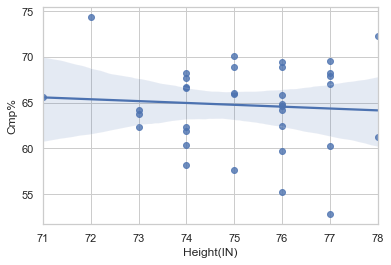

In [349]:
#2018 linear regression height to completion percentage
sns.regplot(x=DF_QB_PM_2018['Height(IN)'], y=DF_QB_PM_2018['Cmp%']);

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(DF_QB_PM_2020.corr(),
    linewidths = 0.25,
    square = True,
    linecolor = 'black',
    annot = True);
plt.title('Correlation Matrix 2020 Season')

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(DF_QB_PM_2019.corr(),
    linewidths = 0.25,
    square = True,
    linecolor = 'black',
    annot = True);
plt.title('Correlation Matrix 2019 Season')

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(DF_QB_PM_2018.corr(),
    linewidths = 0.25,
    square = True,
    linecolor = 'black',
    annot = True);
plt.title('Correlation Matrix 2018 Season')

In [ ]:

# #2018
# sns.set_style('whitegrid')
# plt.figure(figsize=(4, 4))
# sns.scatterplot(DF_QB_PM_2018['Att'], DF_QB_PM_2018['Age'])
# #2019
# sns.set_style('whitegrid')
# plt.figure(figsize=(4, 4))
# sns.scatterplot(DF_QB_PM_2019['Att'], DF_QB_PM_2019['Age'])
# #2020
# sns.set_style('whitegrid')
# plt.figure(figsize=(4, 4))
# sns.scatterplot(DF_QB_PM_2020['Att'], DF_QB_PM_2020['Age'])
# # sns.histplot(ax=axes[0], x=DF_QB_PM[DF_QB_PM['Height']], y=DF_QB_PM[DF_QB_PM['Cmp']]
# # axes[0].set_title('2018')
